In [17]:
from scipy.integrate import odeint
from random import random

import numpy as np
import matplotlib.pyplot as plt

In [24]:
def plotseird(t, S, E, I, R, D, L=None, R0=None):
    fp, axp = plt.subplots(1,1,figsize=(10,4))
    axp.plot(t, S, 'b', linewidth=2, label='Suceptibles')
    axp.plot(t, E, 'y', linewidth=2, label='Expuestos')
    axp.plot(t, I, 'r', linewidth=2, label='Infectados')
    axp.plot(t, R, 'g', linewidth=2, label='Recuperados')
    axp.plot(t, D, 'k', linewidth=2, label='Muertos')
    axp.set_xlabel('Tiempo (dias)')
    legend = axp.legend(borderpad=2.0)
    legend.get_frame().set_alpha(0.5)
    if L is not None:
        plt.title("Encierro en el día {} ".format(L))
    plt.show()

    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, E, 'y', linewidth=2, label='Expuestos')
    ax.plot(t, I, 'r', linewidth=2, label='Infectados')
    ax.plot(t, R, 'g', linewidth=2, label='Recuperados')
    ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Muertos')
    ax.set_xlabel('Tiempo (dias)')
    legend = ax.legend(borderpad=2.0)
    legend.get_frame().set_alpha(0.5)
    plt.show()

    f1 = plt.figure(figsize=(12,4))
    f1p, ax0 = plt.subplots(1,1,figsize=(10,4))
    ax0.plot(t, S, 'b', linewidth=2, label='Susceptible')
    ax.set_xlabel('Tiempo (dias)')
    legend = ax0.legend(borderpad=2.0)
    legend.get_frame().set_alpha(0.5)
    plt.show()

    f2 = plt.figure(figsize=(12,4))
    f2p, ax1 = plt.subplots(1,1,figsize=(10,4))
    ax1.plot(t, R0, 'b--', alpha=0.7, linewidth=2, label='R0')

    ax1.set_xlabel('Tiempo (dias)')
    ax1.title.set_text('R0 con el tiempo')
    legend = ax1.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)

    plt.show()

In [25]:
def deriv(y, t, N, beta, gamma, delta, alpha, rho):
    Z = random()
    S, E, I, R, D = y
    dSdt = (-beta(t) * S * I / N ) * Z
    dEdt = (beta(t) * S * I / N - delta * E ) * Z
    dIdt = delta * E - (1 - alpha) * gamma * I - alpha * rho * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * rho * I
    return dSdt, dEdt, dIdt, dRdt, dDdt


def R_0(t):
    return 9 if t < L else 1.2


def logistic_R_0(t):
    return (R_0_start-R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end


def beta(t):
    return logistic_R_0(t) * gamma


def data_time(t, data):
    print(data[t])
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = ('Expuestos', 'Infectados', 'Recuperados', 'Muertos')
    datos = data[t]
    sizes = datos[1:]
    explode = (0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

In [26]:
N = 6220145
# total population ZMG
# Source: https://www.jalisco.gob.mx/es/jalisco/guadalajara
# In 2015, total population was 4'434,878 people
# The growth rate has been creasing by 7%
# Following that rate, by 2020 the total population is
# ZMG population by 2020: 6'220,145

d = 10
# number of days an infected person has and can spread the disease
# Source: World Health Organization
# https://www.who.int/docs/default-source/coronaviruse/situation-reports/20200402-sitrep-73-covid-19.pdf?sfvrsn=5ae25bc7_4#:~:text=The%20incubation%20period%20for%20COVID,occur%20before%20symptom%20onset.
# "The incubation period for COVID-19, which is the time between exposure to the virus (becoming infected) and
# symptom onset, is on average 5-6 days, however can be up to 14 days."
#
# Taking as consideration of time when a person realize that has the virus
# and put his/her self in quarentine, we've decided the average between
# average and worst case 6 and 14 days.


gamma = 1.0 / d
# proportion of infected recovering per day


delta = 1.0 / 6
# incubation period of n days
# taking as average of incubation time, we've decided 6 days


R_0 = 1.2
# total number of people an infected person infects
# based on Study of 
#    - SoCieDat
#    - ZapopanLab
#    - Data Science Monterrey
#    - Datlab Community
# Taking the average they give between .8 and 1.5 of range.
# Source: https://datoscovid.mx/

def beta(t):
    return R_0 * gamma
# expected amount of people an infected person infects per day

casos_zmg = {
    "confirmados": 1238,
    "sospechosos": 462,
    "descartados": 9037,
    "defunciones": 116
}
casos_total = sum(casos_zmg.values())
alpha = casos_zmg["defunciones"]/casos_total
# death rate
# Source: https://ssj.jalisco.gob.mx/prensa/noticia/9037
# Date: May 25 (latest)

days = 11
rho = 1/days
# days from infection until death
# source: South Corea editorial Dong-A Ilbo's research

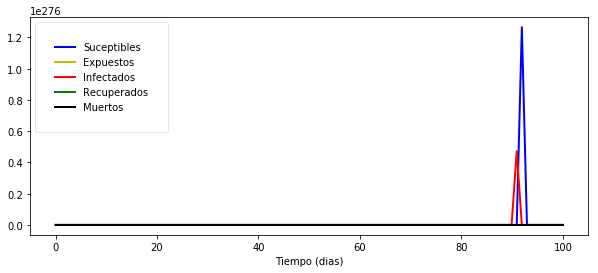

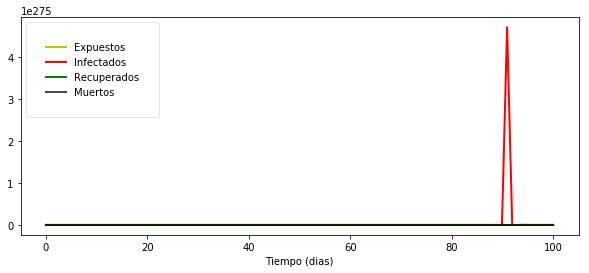

<Figure size 864x288 with 0 Axes>

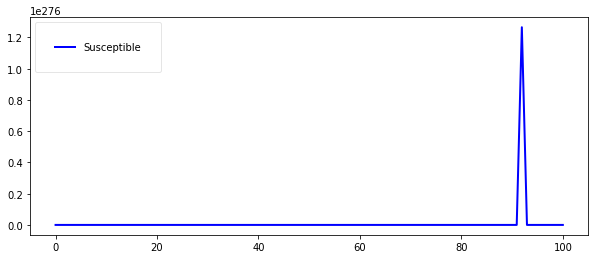

<Figure size 864x288 with 0 Axes>

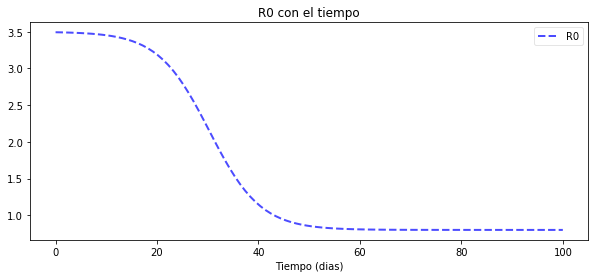

[1.90979778e-313 0.00000000e+000 3.45845952e-323 4.24400499e-314
 0.00000000e+000]


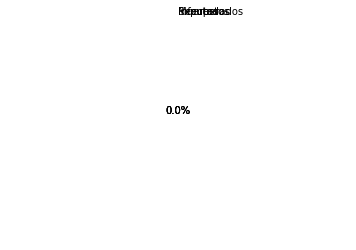

In [27]:
S0, E0, I0, R0, D0 = N-7, 5, 2, 0, 0  # initial conditions
t = np.linspace(0, 100, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, rho))
S, E, I, R, D = ret.T
R0_over_time = [logistic_R_0(i) for i in range(len(t))]

plotseird(t, S, E, I, R, D, R0=R0_over_time)
data_time(30,ret)

0.0
2.0
0


In [ ]:
muertes = sum([ death for death in D ])
infectados = sum([ inf for inf in I ])
print(muertes)
print(infectados)

D1 = list(reversed(D))
Muertes = sum([ D1[idx] - D1[idx + 1] for idx in range(len(D) -1) ])
print(Muertes)